## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Acquire Data

In [2]:
# Read the churn dataset into a dataframe as variable df.
df = pd.read_csv('churn_clean.csv')
df = pd.DataFrame(df)
# Quick look at the data.
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## Gather insight

In [3]:
# Print information about the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Print statistical description of columns in the dataset. 
print(df.describe(include='all'))

          CaseOrder Customer_id                           Interaction  \
count   10000.00000       10000                                 10000   
unique          NaN       10000                                 10000   
top             NaN     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
freq            NaN           1                                     1   
mean     5000.50000         NaN                                   NaN   
std      2886.89568         NaN                                   NaN   
min         1.00000         NaN                                   NaN   
25%      2500.75000         NaN                                   NaN   
50%      5000.50000         NaN                                   NaN   
75%      7500.25000         NaN                                   NaN   
max     10000.00000         NaN                                   NaN   

                                     UID     City  State      County  \
count                              10000    10000  

In [5]:
# Print the data type of each column.
print(df.dtypes)

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [6]:
# Print the sum of mising values in each column.
print(df.isnull().sum())

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [7]:
# Print the percentage of missing values for each column.
print(df.isnull().sum() / len(df) * 100)

CaseOrder               0.0
Customer_id             0.0
Interaction             0.0
UID                     0.0
City                    0.0
State                   0.0
County                  0.0
Zip                     0.0
Lat                     0.0
Lng                     0.0
Population              0.0
Area                    0.0
TimeZone                0.0
Job                     0.0
Children                0.0
Age                     0.0
Income                  0.0
Marital                 0.0
Gender                  0.0
Churn                   0.0
Outage_sec_perweek      0.0
Email                   0.0
Contacts                0.0
Yearly_equip_failure    0.0
Techie                  0.0
Contract                0.0
Port_modem              0.0
Tablet                  0.0
InternetService         0.0
Phone                   0.0
Multiple                0.0
OnlineSecurity          0.0
OnlineBackup            0.0
DeviceProtection        0.0
TechSupport             0.0
StreamingTV         

In [8]:
# Print the sum of duplicates in each column. 
print(df.duplicated().sum())

0


In [9]:
# Print unique values for categorical columns.
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Customer_id: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Unique values in Interaction: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
Unique values in UID: ['e885b299883d4f9fb18e39c75155d990' 'f2de8bef964785f41a2959829830fb8a'
 'f1784cfa9f6d92ae816197eb175d3c71' ... '9c41f212d1e04dca84445019bbc9b41c'
 '3e1f269b40c235a1038863ecf6b7a0df' '0ea683a03a3cd544aefe8388aab16176']
Unique values in City: ['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
Unique values in State: ['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 

## Data Cleaning

In [10]:
# Create variable to hold dtype changes
data_type_corrections = {  
    'Item1': 'str',
    'Item2': 'str',
    'Item3': 'str',
    'Item4': 'str',
    'Item5': 'str',
    'Item6': 'str',
    'Item7': 'str',
    'Item8': 'str',
    'CaseOrder':'str',
    'Zip':'str'
   
}

# Change data types
for column, dtype in data_type_corrections.items():
    df[column] = df[column].astype(dtype)
    


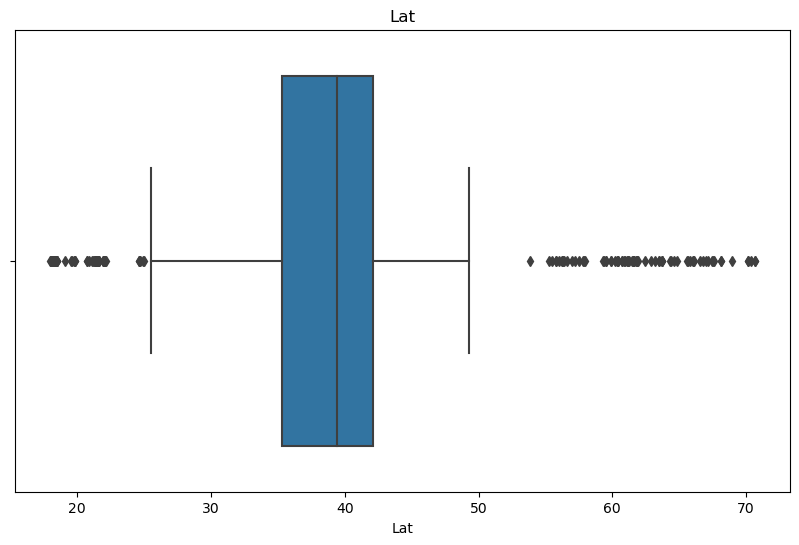

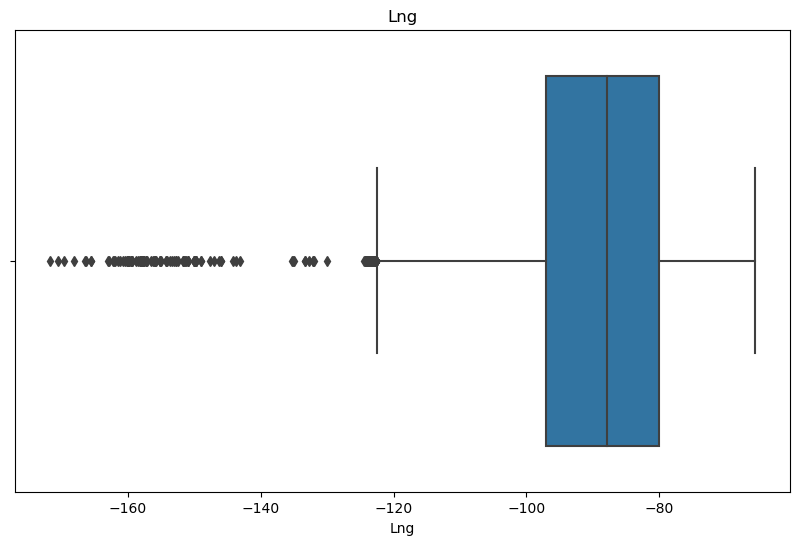

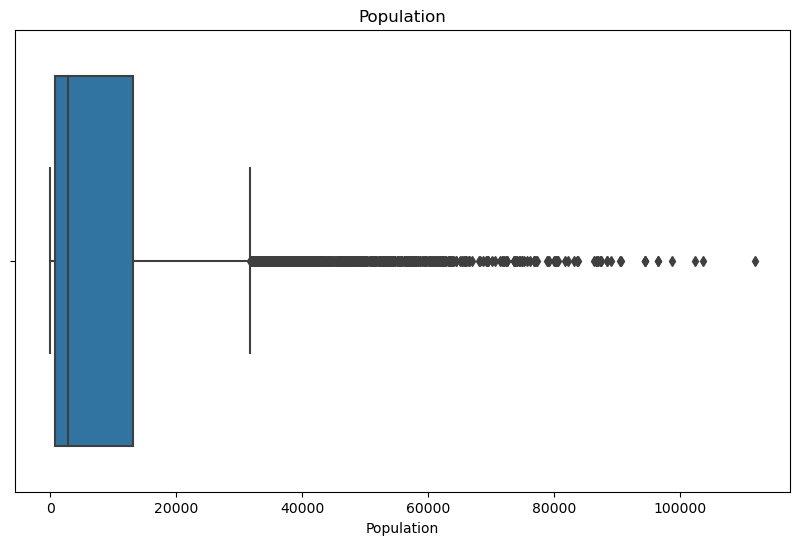

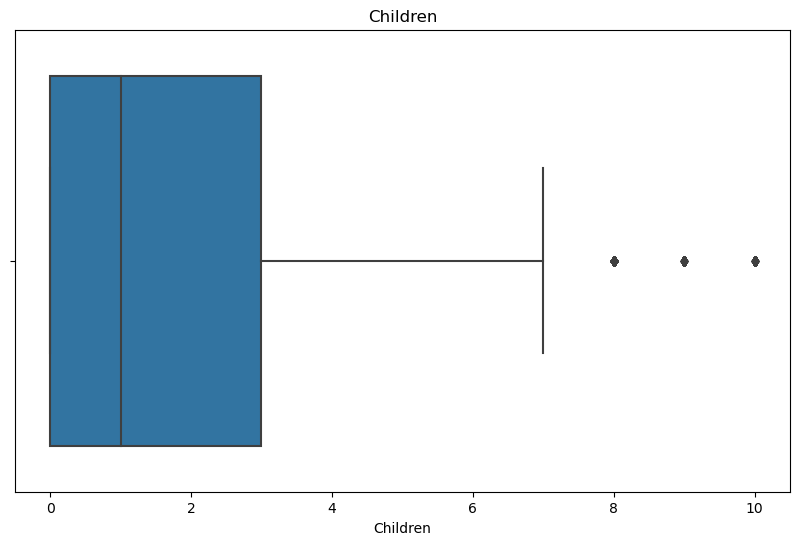

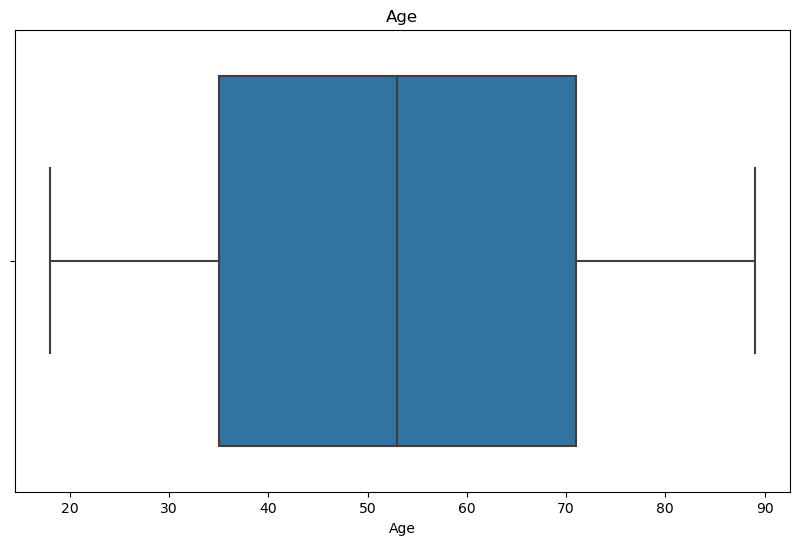

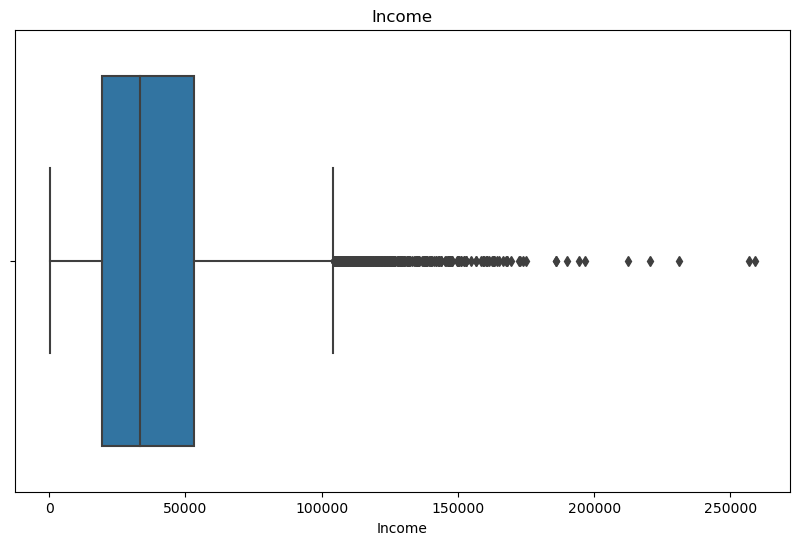

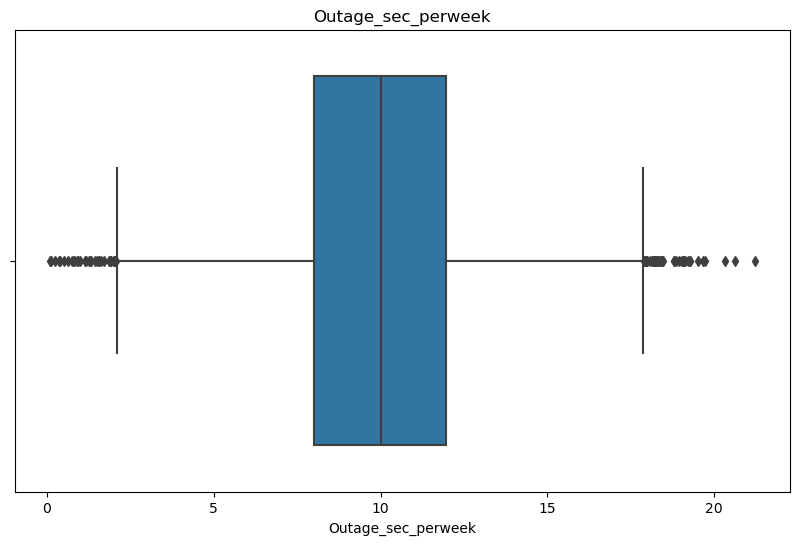

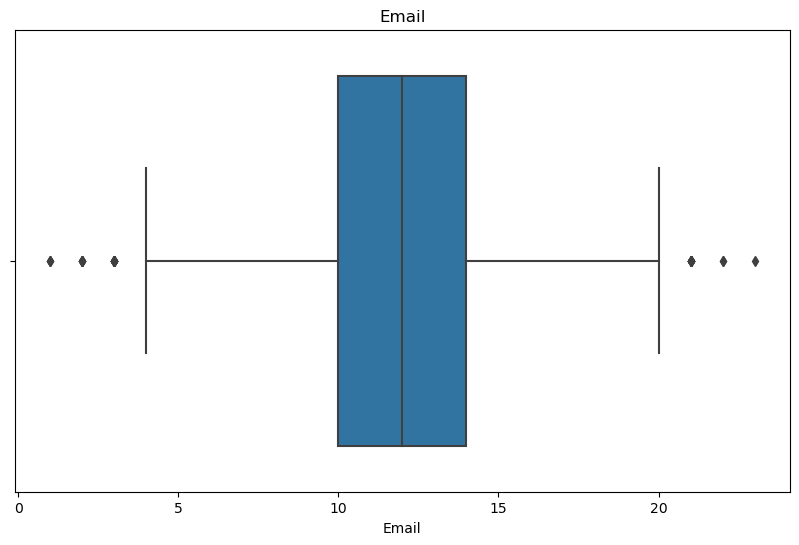

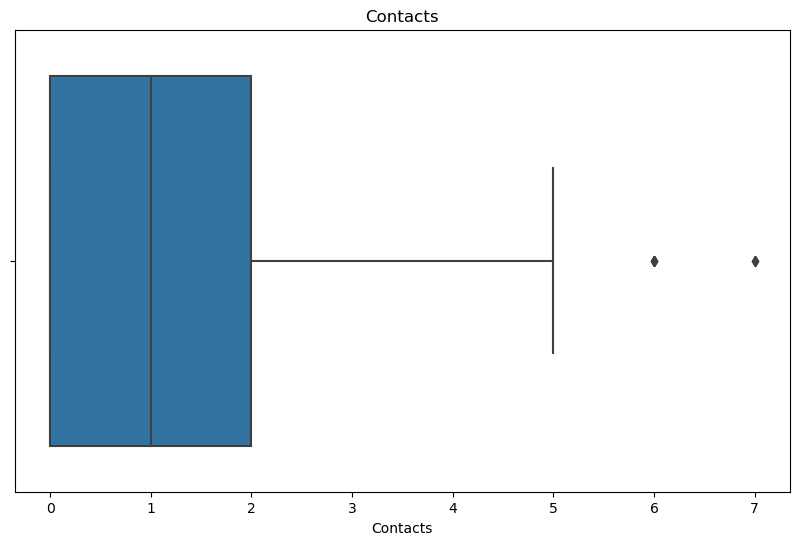

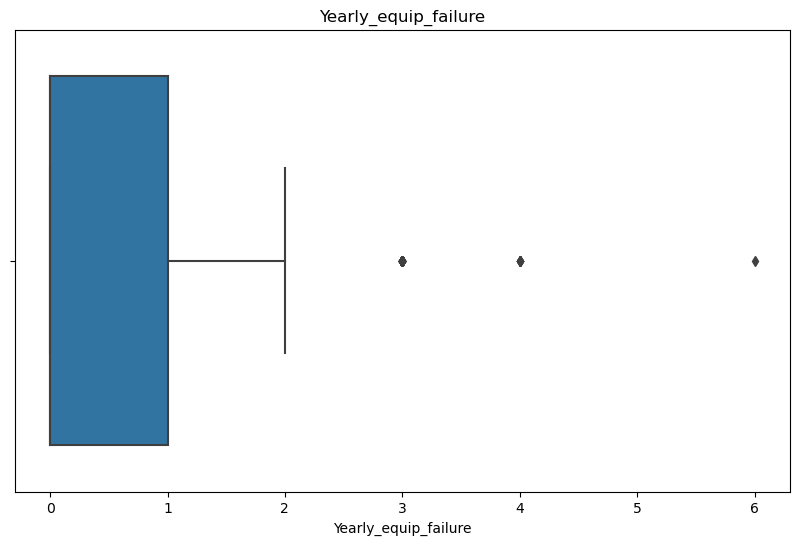

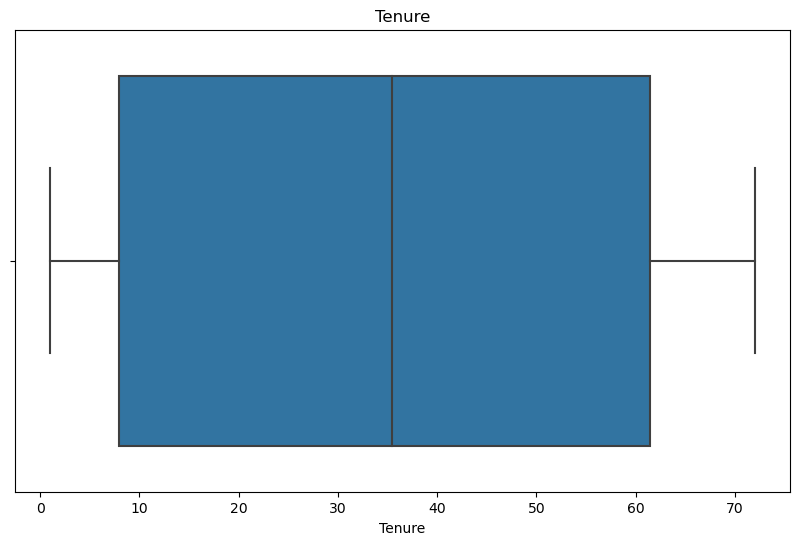

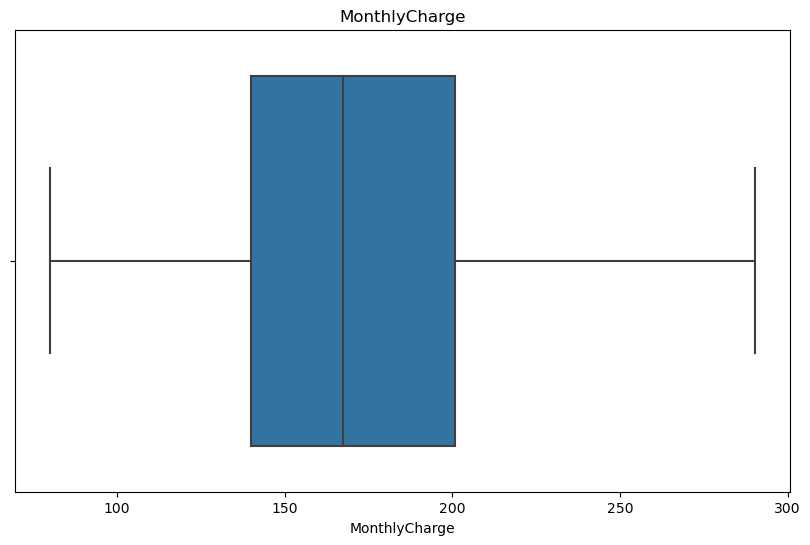

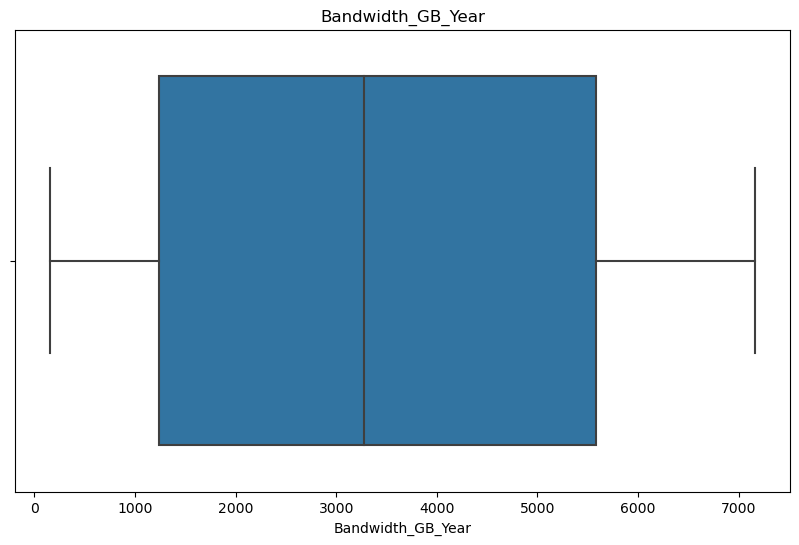

In [11]:
# Create boxplots to visualize outliers in columns.
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

In [12]:
# Renaming item columns.
rename_columns = {
    'Item1': 'Timely response',
    'Item2': 'Timely fixes',
    'Item3': 'Timely replacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectful response',
    'Item7': 'Courteous exchange',
    'Item8': 'Evidence of active listening'
}

df.rename(columns=rename_columns, inplace=True)


# Function to replace outliers with the median.
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the median value.
    median_value = df[column].median()
    
    # Replace outliers with median.
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])


# Apply the function to all numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    replace_outliers(df, col)

In [13]:
# Round numerical values 
df = df.round(2)

# Final look before saving to csv.
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,39.40,-87.92,...,172.46,904.54,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.33,-84.24,...,242.63,800.98,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.36,-87.92,...,159.95,2054.71,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.97,-117.25,...,119.96,2164.58,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38,-95.81,...,149.95,271.49,4,4,4,3,4,4,4,5


In [14]:
# Create a variable for the cleaned data and save file to csv. 
d207_cleaned_data = 'd207_cleaned_data.csv'
df.to_csv(d207_cleaned_data, index=False)

## PCA

In [15]:
# Separate numeric and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Select only numerical columns for PCA
numerical_data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the loading matrix
loading_matrix = pd.DataFrame(pca.components_.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Loading Matrix with All Features:")
print(loading_matrix)

# Identify churn-related features
churn_related_features = [col for col in df.columns if 'Churn' in col.lower()]

# Check if churn-related features are correctly identified
print("Churn-related features: ", churn_related_features)

if churn_related_features:
    # Extract the loadings for churn-related features
    churn_loadings = loading_matrix.loc[churn_related_features]

    # Identify the principal components related to churn by checking high loadings
    # Threshold set at 5 to select significant components
    significant_components = churn_loadings.abs().mean().nlargest(5).index

    # Display the identified principal components related to churn
    print("Principal Components related to Churn:")
    print(significant_components)
else:
    print("No churn-related features found.")

Loading Matrix with All Features:
                           PC1       PC2       PC3       PC4       PC5  \
Lat                  -0.017572 -0.668637  0.273527 -0.177743 -0.053411   
Lng                  -0.001186 -0.040173  0.722947  0.078146 -0.374725   
Population           -0.000518  0.648281  0.264959  0.190986 -0.124189   
Children              0.010142 -0.132192  0.154760  0.555572 -0.013537   
Age                   0.001896  0.097168  0.129208 -0.304414  0.044722   
Income               -0.002463 -0.238801  0.030070  0.018026 -0.109508   
Outage_sec_perweek    0.012023  0.030468  0.351245 -0.013261  0.514158   
Email                -0.017227  0.142074 -0.106220 -0.383663 -0.238207   
Contacts              0.002640  0.088578  0.183845 -0.529111  0.327149   
Yearly_equip_failure  0.011503 -0.080766 -0.085659  0.305659  0.558571   
Tenure                0.705455 -0.009502 -0.020856 -0.018866 -0.031037   
MonthlyCharge         0.040870  0.107048  0.338453 -0.055263  0.293026   
Band

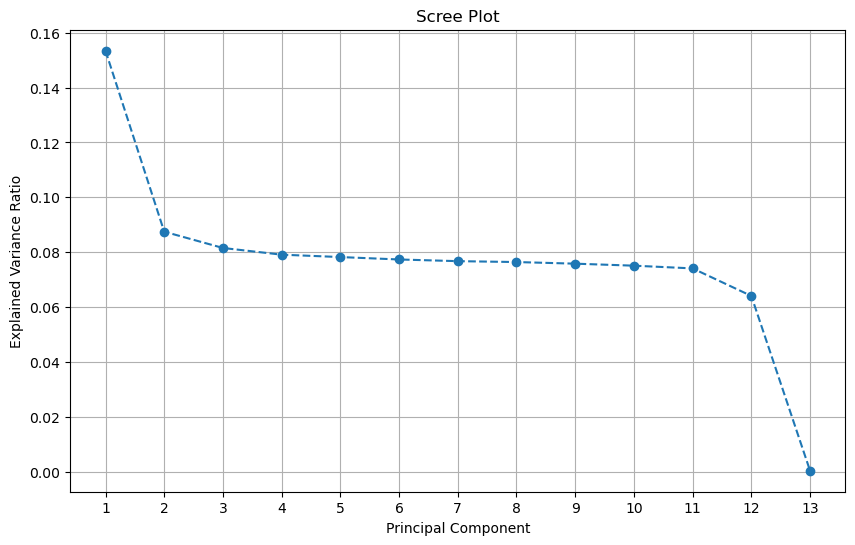

In [16]:
# Explained varience scree plot
explained_variance = pca.explained_variance_ratio_

#Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()


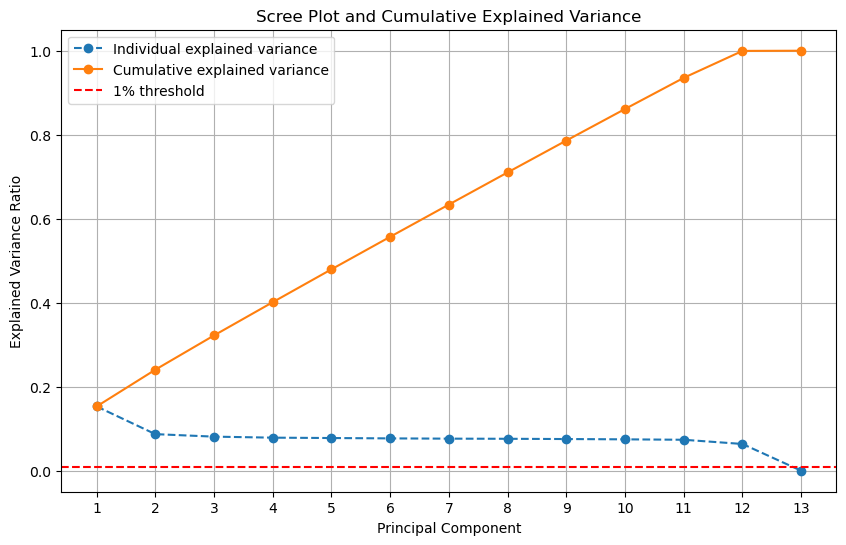

Explained variance ratio for each component:
PC1: 0.1534
PC2: 0.0875
PC3: 0.0816
PC4: 0.0791
PC5: 0.0783
PC6: 0.0774
PC7: 0.0768
PC8: 0.0764
PC9: 0.0758
PC10: 0.0751
PC11: 0.0741
PC12: 0.0641
PC13: 0.0004

Cumulative explained variance ratio:
PC1: 0.1534
PC2: 0.2409
PC3: 0.3225
PC4: 0.4016
PC5: 0.4798
PC6: 0.5572
PC7: 0.6340
PC8: 0.7104
PC9: 0.7862
PC10: 0.8613
PC11: 0.9355
PC12: 0.9996
PC13: 1.0000


In [17]:
# Take a look at cumulative and individual explained variance
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Scree plot with cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.axhline(y=0.01, color='r', linestyle='--', label='1% threshold')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

# Print explained variance for each component
print("Explained variance ratio for each component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

# Print cumulative explained variance
print("\nCumulative explained variance ratio:")
for i, cumulative_variance in enumerate(cumulative_explained_variance, start=1):
    print(f"PC{i}: {cumulative_variance:.4f}")

## Data Exploration

## Numberical Variables

Univariate Statistics for Numerical Variables:
                     count         mean          std     min      25%  \
MonthlyCharge      10000.0   172.624724    42.943016   79.98   139.98   
Bandwidth_GB_Year  10000.0  3392.341505  2185.294958  155.51  1236.47   

                        50%        75%      max      skew  kurtosis  
MonthlyCharge       167.480   200.7375   290.16  0.387314 -0.462594  
Bandwidth_GB_Year  3279.535  5586.1450  7158.98  0.067483 -1.703579  


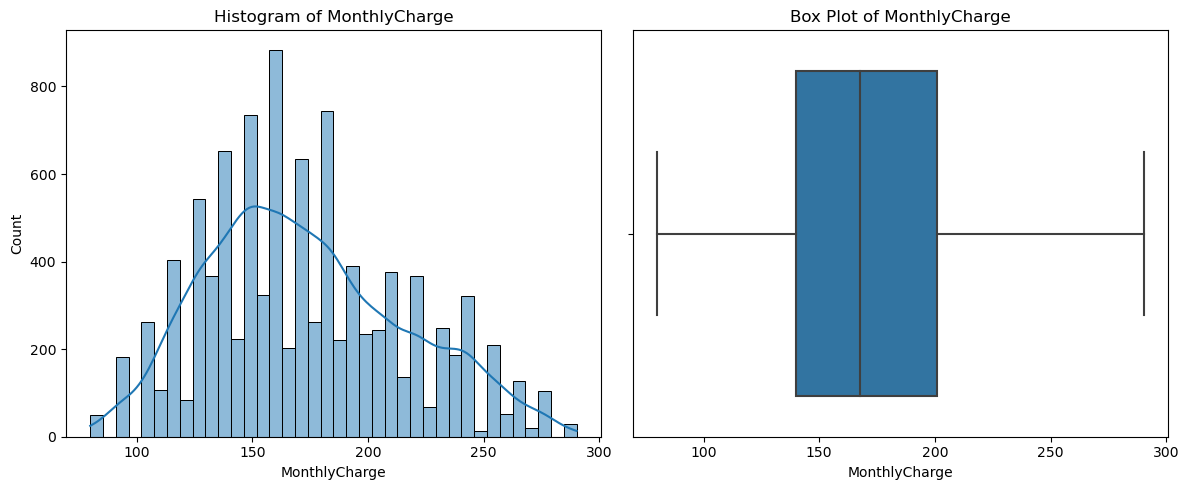

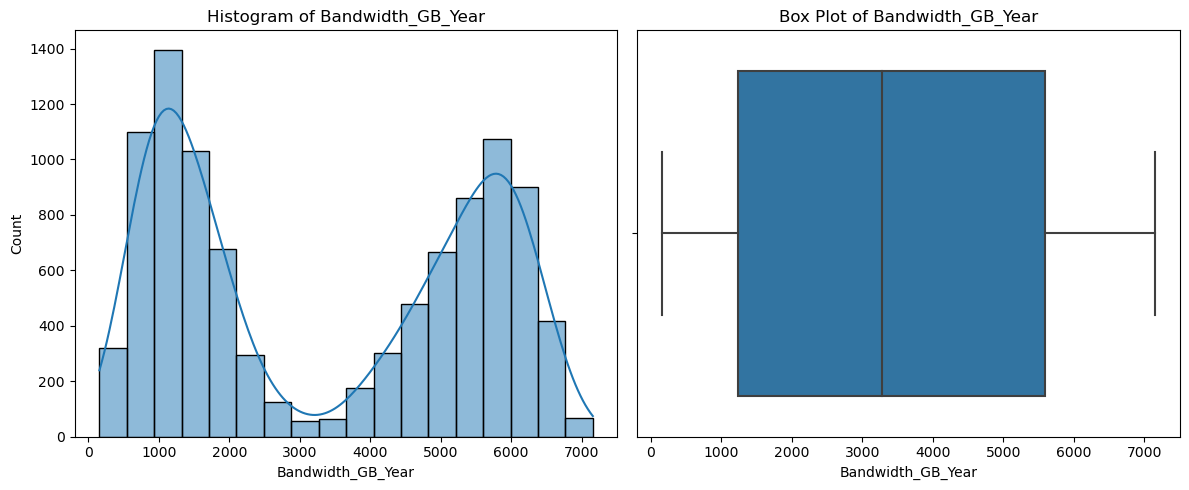

In [18]:
# Univariate statistics for numerical variables
numerical_vars = ['MonthlyCharge', 'Bandwidth_GB_Year']
numerical_stats = df[numerical_vars].describe().T

numerical_stats['skew'] = df[numerical_vars].skew()
numerical_stats['kurtosis'] = df[numerical_vars].kurtosis()

# Display univariate statistics for numerical variables
print("Univariate Statistics for Numerical Variables:")
print(numerical_stats)

# Visualize numerical variables
for var in numerical_vars:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    
    plt.tight_layout()
    plt.show()


Correlation Matrix:
                   MonthlyCharge  Bandwidth_GB_Year
MonthlyCharge           1.000000           0.060405
Bandwidth_GB_Year       0.060405           1.000000


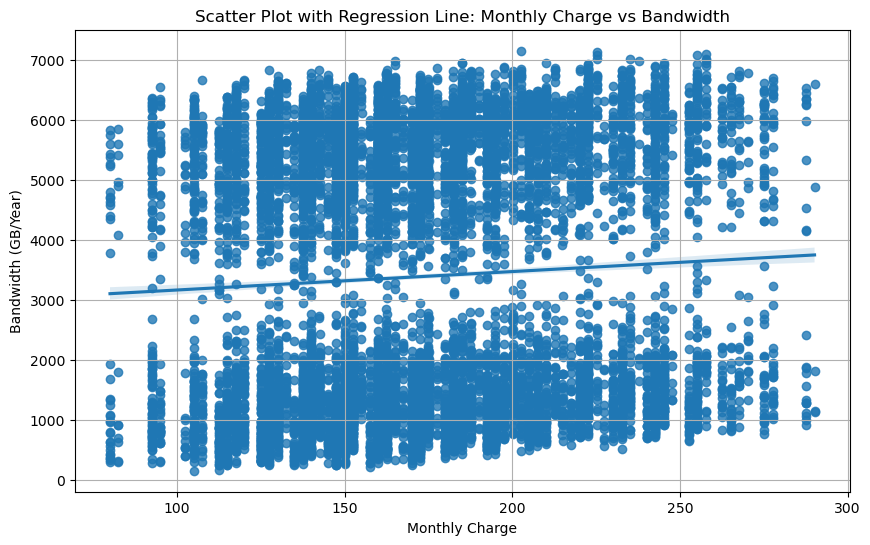

In [19]:
# Bivariate Statistics 
# Calculate the correlation matrix
correlation_matrix = df[['MonthlyCharge', 'Bandwidth_GB_Year']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='MonthlyCharge', y='Bandwidth_GB_Year', data=df)
plt.title('Scatter Plot with Regression Line: Monthly Charge vs Bandwidth')
plt.xlabel('Monthly Charge')
plt.ylabel('Bandwidth (GB/Year)')
plt.grid(True)
plt.show()


In [20]:
# Covert Churn to numerical values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

correlation_matrix = df[['Churn', 'MonthlyCharge', 'Bandwidth_GB_Year']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      Churn  MonthlyCharge  Bandwidth_GB_Year
Churn              1.000000       0.372938          -0.441669
MonthlyCharge      0.372938       1.000000           0.060405
Bandwidth_GB_Year -0.441669       0.060405           1.000000


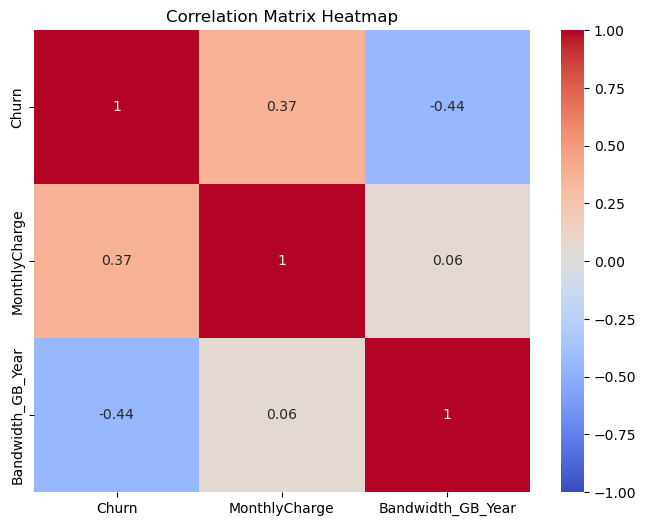

In [21]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

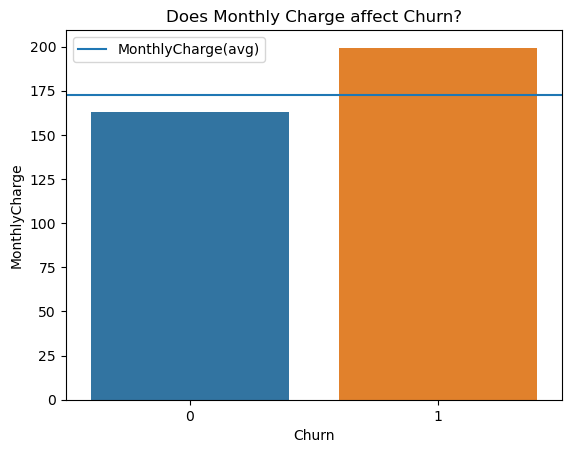

In [22]:
# Plotted the affects of monthly charges on churn
# Shows a view of how the data compares.
plt.title("Does Monthly Charge affect Churn?")
sns.barplot(x="Churn", y="MonthlyCharge", data=df, ci=False)
avg_monthly_charges = df.MonthlyCharge.mean()
plt.axhline(avg_monthly_charges, label="MonthlyCharge(avg)")
plt.legend()
plt.show()

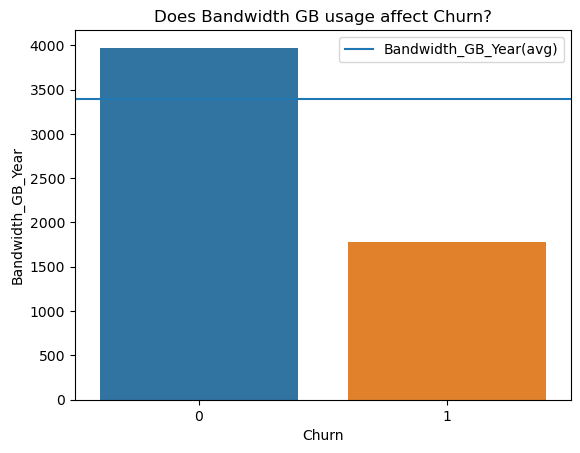

In [23]:
# Plotted the affects of bandwidth usage on churn
# Shows a view of how the data compares.
plt.title("Does Bandwidth GB usage affect Churn?")
sns.barplot(x="Churn", y="Bandwidth_GB_Year", data=df, ci=False)
avg_bandwidth_gb_year = df.Bandwidth_GB_Year.mean()
plt.axhline(avg_bandwidth_gb_year, label="Bandwidth_GB_Year(avg)")
plt.legend()
plt.show()

In [24]:
# Convert Churn column to numeric values for analysis
df['Churn'] = df['Churn'].astype('category').cat.codes

# Create data subsets for churned and non-churned customers
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]

# Calculate mean and standard deviation for MonthlyCharge and Bandwidth_GB_Year
stats = {
    "Variable": ["MonthlyCharge", "Bandwidth_GB_Year"],
    "Churned Mean": [churned['MonthlyCharge'].mean(), churned['Bandwidth_GB_Year'].mean()],
    "Churned Std": [churned['MonthlyCharge'].std(), churned['Bandwidth_GB_Year'].std()],
    "Not Churned Mean": [not_churned['MonthlyCharge'].mean(), not_churned['Bandwidth_GB_Year'].mean()],
    "Not Churned Std": [not_churned['MonthlyCharge'].std(), not_churned['Bandwidth_GB_Year'].std()],
    "t-statistic": [ttest_ind(churned['MonthlyCharge'], not_churned['MonthlyCharge']).statistic, ttest_ind(churned['Bandwidth_GB_Year'], not_churned['Bandwidth_GB_Year']).statistic],
    "p-value": [ttest_ind(churned['MonthlyCharge'], not_churned['MonthlyCharge']).pvalue, ttest_ind(churned['Bandwidth_GB_Year'], not_churned['Bandwidth_GB_Year']).pvalue]
}

bivariate_stats = pd.DataFrame(stats)
print(bivariate_stats)

            Variable  Churned Mean  Churned Std  Not Churned Mean  \
0      MonthlyCharge    199.295034    41.268028        163.008898   
1  Bandwidth_GB_Year   1785.009098  1375.370260       3971.855910   

   Not Churned Std  t-statistic  p-value  
0        39.322110    40.189476      0.0  
1      2132.649565   -49.223724      0.0  


In [25]:
# Set variable alpha to 0.05
alpha = 0.05

# Set null_hypothesis and alternative_hypothesis variables to a string
# to represent the possible results.
null_hypothesis = "monthly charges and churn are independent"
alternative_hypothesis = "there is a significant relationship between churn and monthly charges"

# Separate the data into two groups based on Churn
churned = df[df['Churn'] == 1]['MonthlyCharge']
not_churned = df[df['Churn'] == 0]['MonthlyCharge']

# Perform a t-test
t_stat, p_val = ttest_ind(churned, not_churned)

# If statement to print the result. If p < alpha you get the first two statements
# If not you get the else statement.
if p_val < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"T-test statistic: {t_stat}, P-value: {p_val}")


Reject the null hypothesis that monthly charges and churn are independent
Sufficient evidence to move forward understanding that there is a significant relationship between churn and monthly charges
T-test statistic: 40.189475773641476, P-value: 0.0


In [26]:
# Set variable alpha to 0.05
alpha = 0.05

# Set null_hypothesis and alternative_hypothesis variables to a string
# to represent the possible results.
null_hypothesis = "Bandwidth_GB_Year and churn are independent"
alternative_hypothesis = "there is a significant relationship between churn and Bandwidth_GB_Year"

# Separate the data into two groups based on Churn
churned = df[df['Churn'] == 1]['Bandwidth_GB_Year']
not_churned = df[df['Churn'] == 0]['Bandwidth_GB_Year']

# Perform a t-test
t_stat, p_val = ttest_ind(churned, not_churned)

# If statement to print the result. If p < alpha you get the first two statements
# If not you get the else statement.
if p_val < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"T-test statistic: {t_stat}, P-value: {p_val}")

Reject the null hypothesis that Bandwidth_GB_Year and churn are independent
Sufficient evidence to move forward understanding that there is a significant relationship between churn and Bandwidth_GB_Year
T-test statistic: -49.22372364208122, P-value: 0.0


## Categorical Variables

In [27]:
# Univariate statistics for categorical variables
# Frequency counts for Contract
contract_counts = df['Contract'].value_counts()
print("Frequency Counts for Contract:")
print(contract_counts)

# Frequency counts for InternetService
internet_service_counts = df['InternetService'].value_counts()
print("Frequency Counts for InternetService:")
print(internet_service_counts)


Frequency Counts for Contract:
Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64
Frequency Counts for InternetService:
Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64


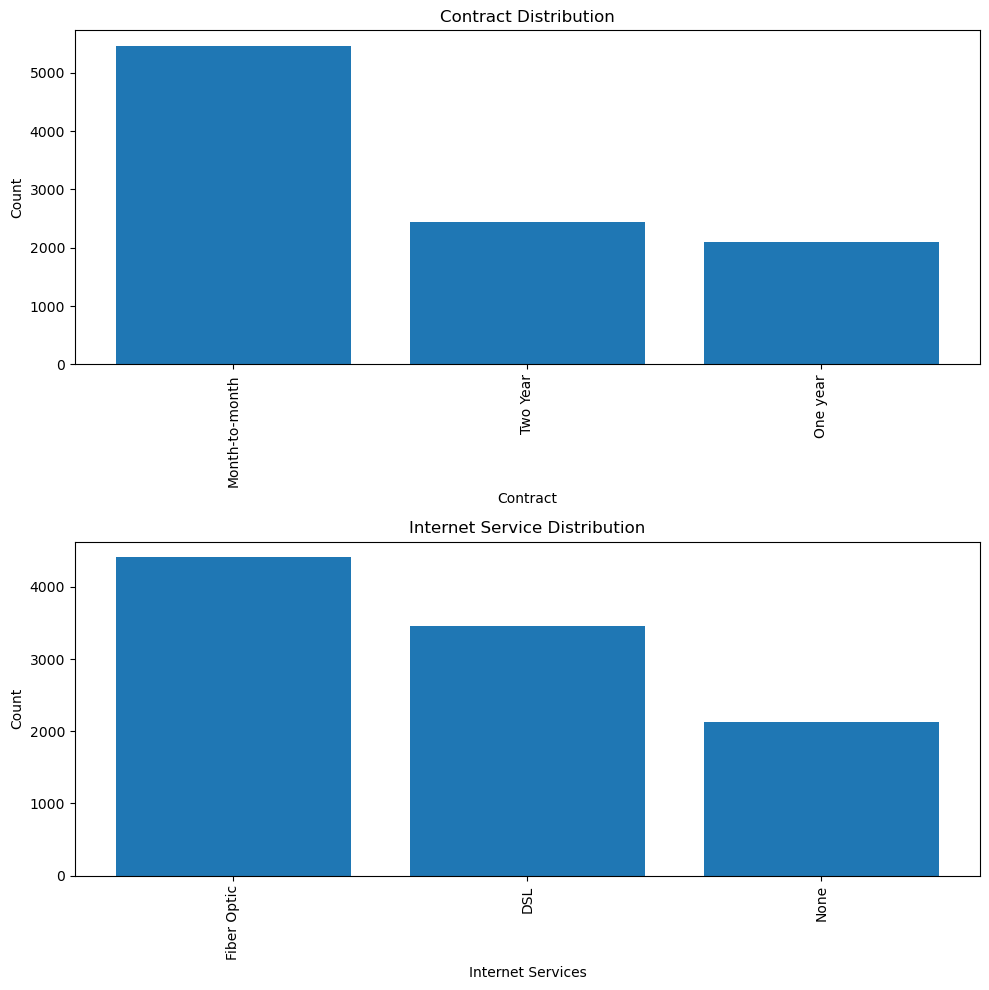

In [28]:
# Visualizing the distribution of the categorical variables
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Contract distribution
state_distribution = df['Contract'].value_counts()
axes[0].bar(state_distribution.index, state_distribution.values)
axes[0].set_title('Contract Distribution')
axes[0].set_xlabel('Contract')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# InternetService distribution 
city_distribution = df['InternetService'].value_counts().head(10)
axes[1].bar(city_distribution.index, city_distribution.values)
axes[1].set_title('Internet Service Distribution')
axes[1].set_xlabel('Internet Services')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [29]:
# Bivariate Statistics 
# Create a contingency table for Contract and InternetService
contingency_table = pd.crosstab(df['Contract'], df['InternetService'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
InternetService   DSL  Fiber Optic  None
Contract                                
Month-to-month   1878         2419  1159
One year          734          897   471
Two Year          851         1092   499


In [30]:
# Create a contingency table for InternetService and Churn
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Churn               0     1
InternetService            
DSL              2349  1114
Fiber Optic      3368  1040
None             1633   496


In [31]:
# Create a contingency table for Contract and Churn
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Churn              0     1
Contract                  
Month-to-month  3422  2034
One year        1795   307
Two Year        2133   309


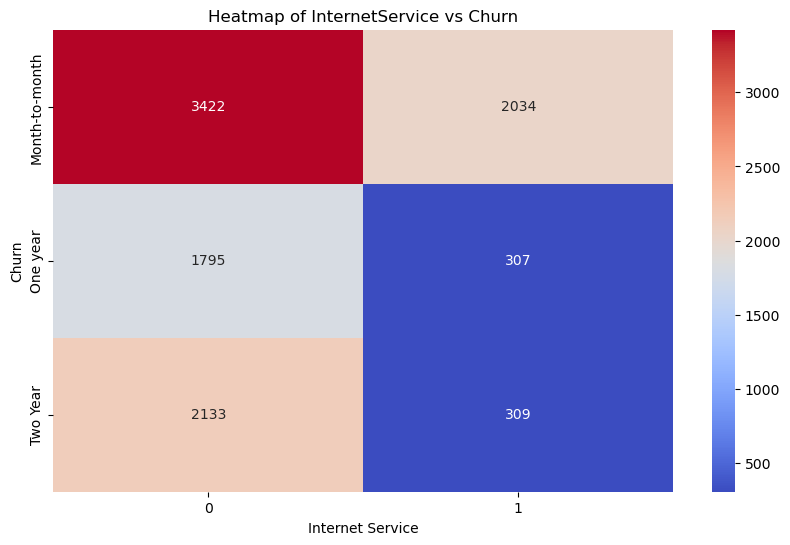

In [32]:
# Heatmap of the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of InternetService vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Churn')
plt.show()

Contingency Table:
Churn              0     1
Contract                  
Month-to-month  3422  2034
One year        1795   307
Two Year        2133   309


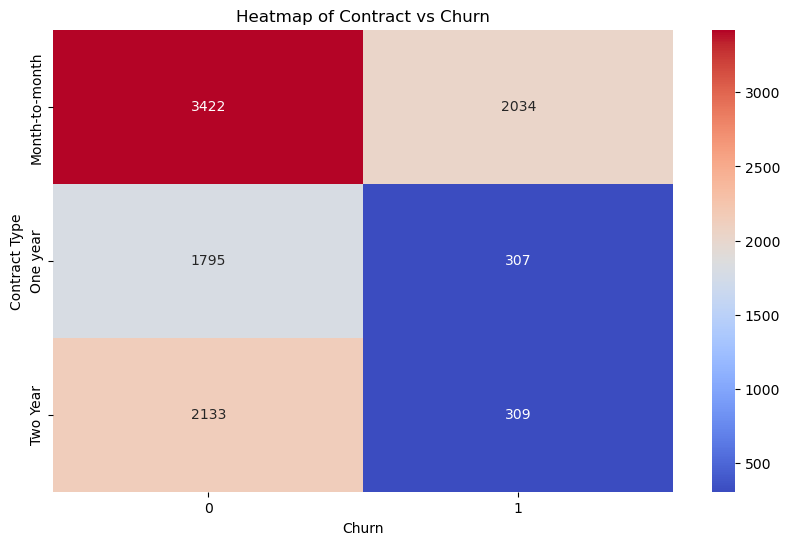

In [33]:
# Create a contingency table for Contract and Churn
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Heatmap of the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Contract vs Churn')
plt.xlabel('Churn')
plt.ylabel('Contract Type')
plt.show()

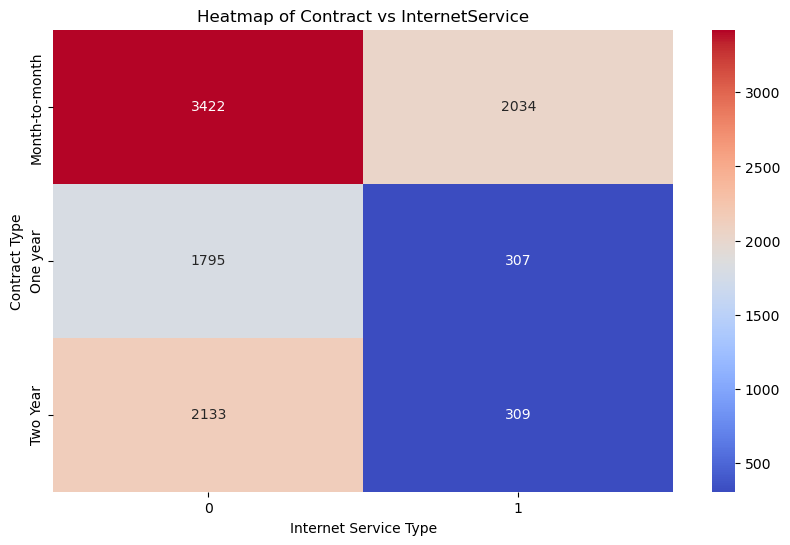

In [34]:
# Heatmap of the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Contract vs InternetService')
plt.xlabel('Internet Service Type')
plt.ylabel('Contract Type')
plt.show()


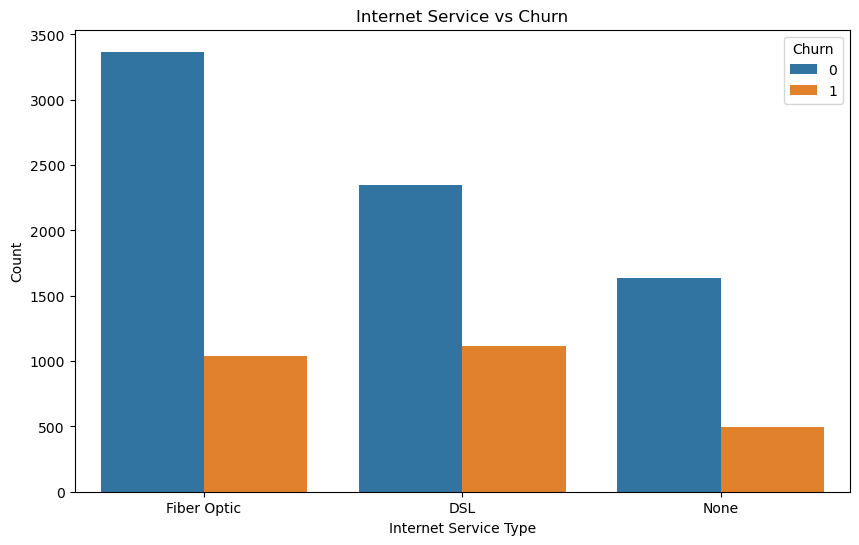

In [35]:
# Plotted the affects of Internet Service on Churn
# Shows a view of how the data compares.
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

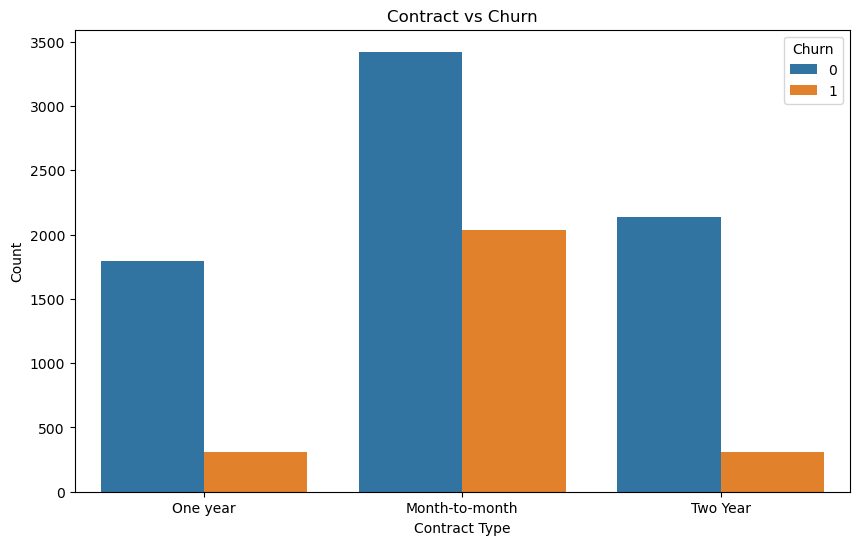

In [36]:
# Plotted the affects of Contract type on Churn
# Shows a view of how the data compares.
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

In [37]:
from scipy import stats
#Lets run a chi squared to compare proportions, to have more confidence
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "InternetService and Churn are independent "
alternative_hypothesis = "there is a significant relationship between Churn and InternetService"

#Setup a crosstab of observed churn to InternetService
observed = pd.crosstab(df.Churn, df['InternetService'])

#The stats.chi2_contigency(observed) function does the heavy lifting here. It computes the 
#chi-square statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.
chi2, p, degf, expected = stats.chi2_contingency(observed)

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that InternetService and Churn are independent 
Sufficient evidence to move forward understanding that there is a significant relationship between Churn and InternetService


1.0182587025108532e-19

In [38]:
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "Contract and Churn are independent "
alternative_hypothesis = "there is a significant relationship between Churn and Contracts"

#Setup a crosstab of observed churn to Contract
observed = pd.crosstab(df.Churn, df['Contract'])

#The stats.chi2_contigency(observed) function does the heavy lifting here. It computes the 
#chi-square statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.
chi2, p, degf, expected = stats.chi2_contingency(observed)

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that Contract and Churn are independent 
Sufficient evidence to move forward understanding that there is a significant relationship between Churn and Contracts


9.116348157571405e-157